In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import defaultdict
from spacy.util import minibatch
from spacy.util import compounding
import spacy
import os
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objs as go
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]


In [4]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [5]:
pio.renderers.default = "notebook_connected"


In [6]:
!ls /fp/projects01/ec307/ec-krimhau/jira_datasets/

highest_high_vs_low_lowest_balanced_jira.csv	high_highest_vs_rest
highest_vs_lowest_balanced_jira.csv		high_vs_rest
highest_vs_rest_balanced_jira.csv		jira_clean_with_all_cols.csv
highest_vs_rest_min_len_25th_balanced_jira.csv


In [7]:
file_name = "highest_vs_rest_min_len_25th_balanced_jira.csv"
path_name = "/fp/projects01/ec307/ec-krimhau/jira_datasets"
full_name = f"{path_name}/{file_name}"

In [8]:
df = pd.read_csv(full_name, index_col=0)
df

,text
label,
1,codejava in importtestmodule mod selffspathpyi...
0,o the goal is move the add node delete node ad...
0,fileformatwriterwrite will sort the partition ...
1,it would be nice to have the ability in mapred...
1,enable maker checker in go to systemconfigure ...
...,...
1,for jbide please perform the following make su...
0,the main idea to add a few strategies of index...
0,each partition has its own version number so t...


In [9]:
# Drop NaN values and reset index of dataframe
df = df[df['text'].notna()]
df = df.reset_index()

In [10]:
df


,label,text
0,1,codejava in importtestmodule mod selffspathpyi...
1,0,o the goal is move the add node delete node ad...
2,0,fileformatwriterwrite will sort the partition ...
3,1,it would be nice to have the ability in mapred...
4,1,enable maker checker in go to systemconfigure ...
...,...,...
89551,1,for jbide please perform the following make su...
89552,0,the main idea to add a few strategies of index...
89553,0,each partition has its own version number so t...
89554,1,expected behavior jibmaven task published the ...


In [11]:
df["label"].value_counts()

label
1    44778
0    44778
Name: count, dtype: int64

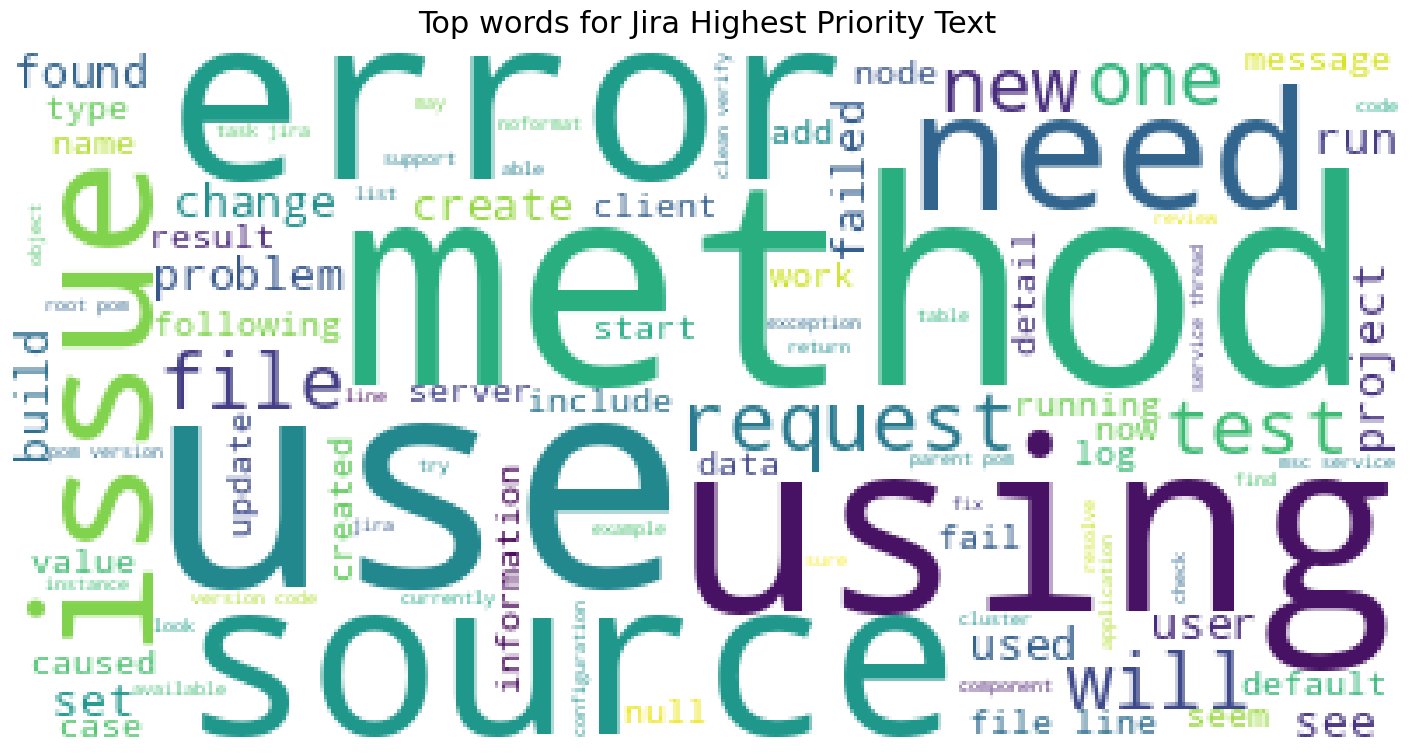

In [12]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


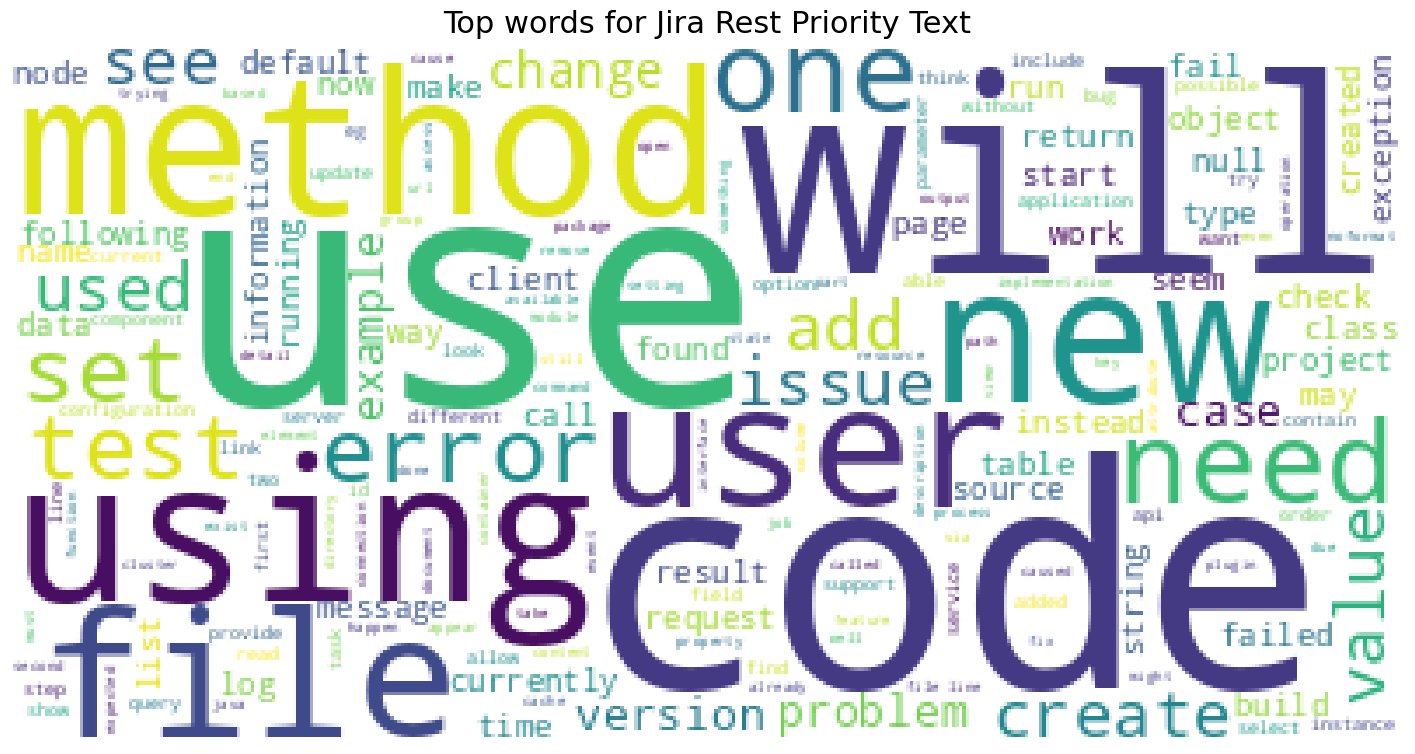

In [13]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 0, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Rest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [14]:
top_debt_words = wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))


In [15]:
top_debt_words.words_

{'use': 1.0,
 'method': 0.8968785542777707,
 'using': 0.8885378491090611,
 'error': 0.8287627953999748,
 'source': 0.8115758877796032,
 'need': 0.8067736635915582,
 'issue': 0.7994439529887527,
 'request': 0.7774548211803362,
 'will': 0.703778592190067,
 'file': 0.6987236193605459,
 'one': 0.6973335018324277,
 'test': 0.6694047769493239,
 'new': 0.6644761784405409,
 'problem': 0.6584102110451157,
 'see': 0.6490585113105017,
 'user': 0.6442562871224568,
 'run': 0.596865916845697,
 'set': 0.596613168204221,
 'create': 0.596613168204221,
 'found': 0.5943384304309365,
 'change': 0.5930746872235562,
 'project': 0.5817009983571338,
 'failed': 0.5528876532288639,
 'build': 0.5282446606849488,
 'used': 0.5186402123088588,
 'following': 0.5148489826867181,
 'server': 0.4899532415013269,
 'fail': 0.48603563755844814,
 'caused': 0.48123341337040315,
 'file line': 0.461013522052319,
 'start': 0.4462277265259699,
 'add': 0.4426892455453052,
 'work': 0.4330847971692152,
 'name': 0.4253759636041956,


In [16]:
df['text_len'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()


,label,text,text_len
0,1,codejava in importtestmodule mod selffspathpyi...,34
1,0,o the goal is move the add node delete node ad...,48
2,0,fileformatwriterwrite will sort the partition ...,95
3,1,it would be nice to have the ability in mapred...,37
4,1,enable maker checker in go to systemconfigure ...,124


In [17]:
# Assuming 'text_len' is already calculated as shown previously
description = df['text_len'].describe()

# Applying formatting to make numbers more readable
formatted_description = description.apply(lambda x: f"{x:,.0f}")
print(formatted_description)

count    89,556
mean        103
std         244
min           1
25%          41
50%          64
75%         113
max      27,345
Name: text_len, dtype: object


In [18]:
df['text_len'].describe()

count    89556.000000
mean       102.670899
std        244.069284
min          1.000000
25%         41.000000
50%         64.000000
75%        113.000000
max      27345.000000
Name: text_len, dtype: float64

In [20]:
balance_counts = df.groupby('label')['label'].agg('count').values
balance_counts


array([44778, 44778])

In [22]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Non-'],
    y=[balance_counts[0]],
    name='Non-TD',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['TD'],
    y=[balance_counts[1]],
    name='TD',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by label</span>'
)
fig.show()


In [ ]:
Non_df = df[df['label'] == 0]['text_len'].value_counts().sort_index()
df1 = df[df['label'] == 1]['text_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Non_df.index,
    y=Non_df.values,
    name='Rest',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1.values,
    name='Highest Priority',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Message length</span>'
)
fig.update_xaxes(range=[0, 300])
fig.show()


In [ ]:
from nltk.util import ngrams
from plotly import tools
import plotly.offline as py
import nltk
nltk.download('stopwords')

In [ ]:
#Gram analysis on Training set- Bigram and Trigram
stopword = set(stopwords.words('english'))


def gram_analysis(data, gram):
    tokens = [t for t in data.lower().split(
        " ") if t != "" if t not in stopword]
    ngrams = zip(*[tokens[i:] for i in range(gram)])
    final_tokens = [" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis

def create_dict(data, grams):
    freq_dict = defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence, grams):
            freq_dict[tokens] += 1
    return freq_dict


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace


def create_new_df(freq_dict,):
    freq_df = pd.DataFrame(sorted(freq_dict.items(), key=lambda z: z[1])[::-1])
    freq_df.columns = ['n_gram_words', 'n_gram_frequency']
   
    trace = horizontal_bar_chart(freq_df[:20], 'orange')
    return trace


def plot_grams(trace_zero, trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of Non_TD ",
                                              "Frequent words of TD"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900,
                         paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')


In [ ]:
df_zero = df[df['label'] == 0]
df_ones= df[df['label'] == 1]

In [ ]:
print("Bi-gram analysis")
freq_df_zero=create_dict(df_zero["text"],2)

In [ ]:
trace_zero = create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 2)
trace_ones = create_new_df(freq_df_ones)


In [ ]:
plot_grams(trace_zero, trace_ones)


In [ ]:
print("Tri-gram analysis")
freq_df_zero = create_dict(df_zero["text"], 3)
trace_zero=create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 3)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)